In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('telecomX')
df.head()

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_DeviceProtection  \
0                      DSL  ...                        No   
1                      DSL  ...                        No   
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   
4              Fiber optic  ...                        No   

  internet_TechSupport internet_StreamingTV internet_StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account_Contract account_PaperlessBilling account_PaymentMethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   
4   Month-to-month                      Yes          Mailed check   

  account_Charges_Monthly account_Charges_Total  Cuentas_diarias  
0                    65.6                593.30         2.186667  
1                    59.9                542.40         1.996667  
2                    73.9                280.85         2.463333  
3                    98.0               1237.85         3.266667  
4                    83.9                267.40         2.796667  

[5 rows x 22 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [4]:
df = df.drop(columns = ['customerID'])
df.columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total', 'Cuentas_diarias'],
      dtype='object')

In [5]:
df_encoded = df.copy()

binary_cols = ['customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling']


for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})

multi_class_cols = [
          'customer_gender',
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod']

df_encoded = pd.get_dummies(df_encoded, columns=multi_class_cols, drop_first=True)


df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

print(df_encoded.head())
print(df_encoded.info())

   Churn  customer_SeniorCitizen  customer_Partner  customer_Dependents  \
0    0.0                       0                 1                    1   
1    0.0                       0                 0                    0   
2    1.0                       0                 0                    0   
3    1.0                       1                 1                    0   
4    1.0                       1                 1                    0   

   customer_tenure  phone_PhoneService  phone_MultipleLines  \
0                9                   1                  0.0   
1                9                   1                  1.0   
2                4                   1                  0.0   
3               13                   1                  0.0   
4                3                   1                  0.0   

   internet_OnlineSecurity  internet_OnlineBackup  internet_DeviceProtection  \
0                      0.0                    1.0                        0.0   
1         

In [6]:
df_encoded['Churn'].value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

In [7]:
df_encoded['Churn'].value_counts(normalize=True)

Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64

Churn                                            1.000000
internet_InternetService_Fiber optic             0.308020
account_PaymentMethod_Electronic check           0.301919
account_Charges_Monthly                          0.193356
Cuentas_diarias                                  0.193356
account_PaperlessBilling                         0.191825
customer_SeniorCitizen                           0.150889
phone_MultipleLines                              0.040207
phone_PhoneService                               0.011942
customer_gender_Male                            -0.008612
internet_StreamingTV                            -0.037057
internet_StreamingMovies                        -0.040132
account_PaymentMethod_Mailed check              -0.091683
account_PaymentMethod_Credit card (automatic)   -0.134302
customer_Partner                                -0.150448
customer_Dependents                             -0.164221
internet_DeviceProtection                       -0.177125
account_Contra

/tmp/ipython-input-1931493887.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="viridis")


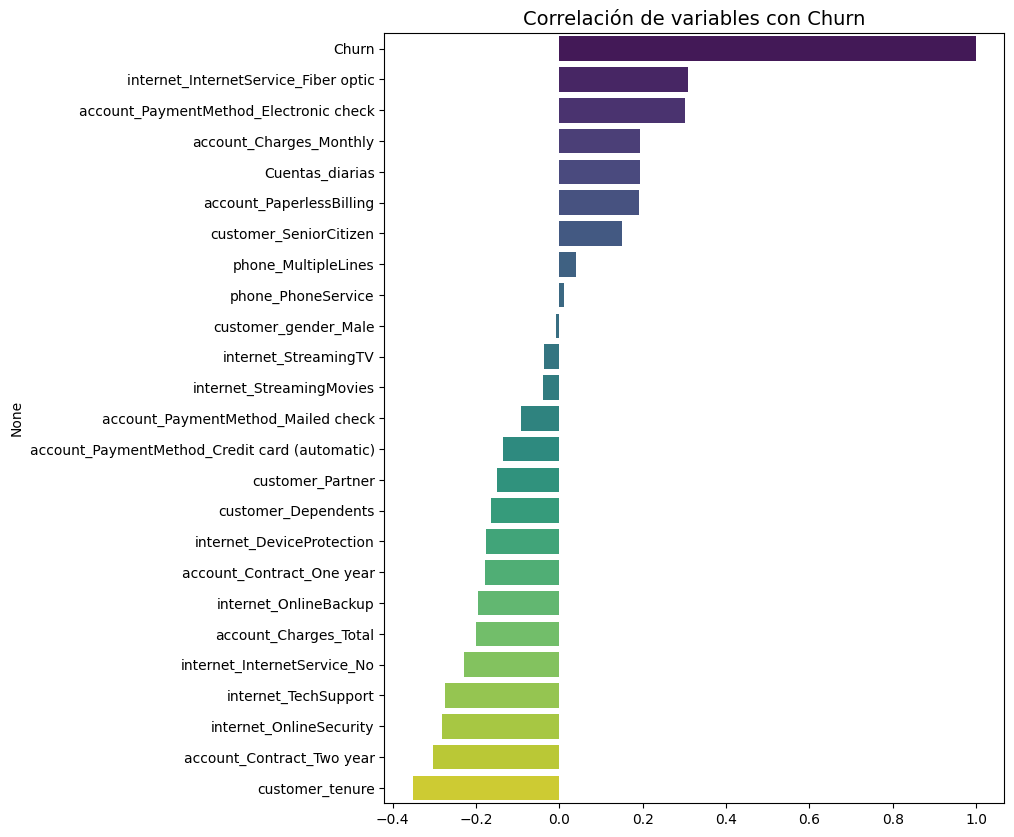

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_encoded.corr()
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)

print(churn_corr)



plt.figure(figsize=(8,10))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="viridis")
plt.title("Correlaci√≥n de variables con Churn", fontsize=14)
plt.show()

In [9]:
df_encoded.drop(columns = ['phone_PhoneService','customer_gender_Male','phone_MultipleLines'], axis=1,inplace=True)

In [10]:
df_encoded = df_encoded.dropna(subset=['Churn'])

In [11]:
df_encoded['Churn'].value_counts(normalize=True)


Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64

In [13]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
imputer = SimpleImputer(strategy="median")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

üìä Regresi√≥n Log√≠stica
Accuracy: 0.7434926644581165
              precision    recall  f1-score   support

         0.0       0.91      0.72      0.81      1552
         1.0       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113



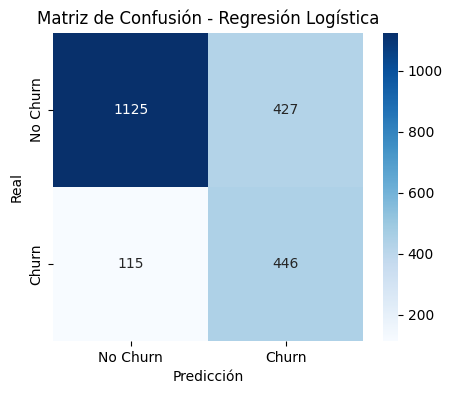

üìä Random Forest
Accuracy: 0.780407004259347
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1552
         1.0       0.61      0.50      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



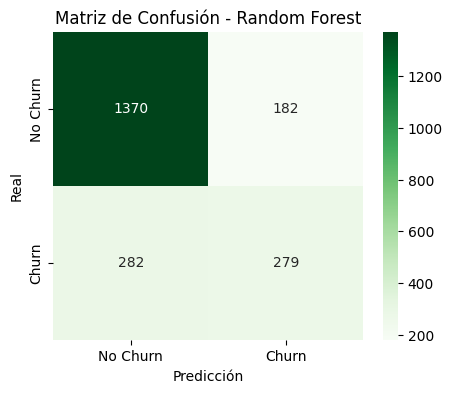

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred_log = log_reg.predict(X_test_scaled)

print("üìä Regresi√≥n Log√≠stica")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()



from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_imputed, y_train)

y_pred_rf = rf_clf.predict(X_test_imputed)

print("üìä Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Matriz de Confusi√≥n - Random Forest")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()


Comparaci√≥n de modelos

 Random Forest

Accuracy: 0.78 (ligeramente mejor que la regresi√≥n log√≠stica en general).

Muy bueno detectando clientes que NO cancelan (Clase 0 ‚Üí recall 0.88).

M√°s d√©bil para detectar clientes que S√ç cancelan (Clase 1 ‚Üí recall 0.50).

Tiende a equilibrar, pero favorece a la clase mayoritaria (No Churn).

 Regresi√≥n Log√≠stica

Accuracy: 0.74 (un poco menor que Random Forest).

Excelente en predecir cancelaciones reales (Clase 1 ‚Üí recall 0.80, mucho mejor que RF).

Sin embargo, baja un poco en precisi√≥n para cancelados (0.51, es decir, a veces ‚Äúse confunde‚Äù).

Tiende a ser m√°s sensible a detectar churn, aunque se equivoque m√°s veces.

Si la empresa quiere detectar con m√°s seguridad a los clientes que cancelar√°n (Churn) ‚Üí Regresi√≥n Log√≠stica es mejor, porque alcanza un recall mucho m√°s alto en la clase 1 (80%).

Si se busca un modelo m√°s equilibrado en general y con m√°s exactitud total ‚Üí Random Forest es la mejor opci√≥n, aunque se le escapan m√°s clientes que cancelan.

# **Informe de Predicci√≥n de Cancelaci√≥n (Churn)**

Construimos dos modelos: Regresi√≥n Log√≠stica  y Random Forest

En test:

Random Forest: Accuracy 0.78; para Churn=1: Precision 0.61, Recall 0.50, F1 0.55.

Regresi√≥n Log√≠stica: Accuracy 0.74; para Churn=1: Precision 0.51, Recall 0.80, F1 0.62.

Conclusi√≥n pr√°ctica: si el objetivo es detectar al m√°ximo a los que se van (recuperaciones), la Regresi√≥n Log√≠stica es preferible (Recall=0.80). Si se busca desempe√±o global, Random Forest ofrece mayor accuracy, pero deja escapar m√°s churn reales.

2) Variables que m√°s influyen en la cancelaci√≥n

Basado en las correlaciones con Churn y la codificaci√≥n (mes de referencia: Month-to-month al usar drop_first):

Factores que aumentan el churn (correlaci√≥n positiva)

Internet: Fiber optic (+0.31)
Posible mayor sensibilidad a incidencias t√©cnicas/competencia.

Pago con Electronic check (+0.30)
Segmento propenso a cancelar; su contraparte ‚Äúautom√°tico‚Äù reduce churn.

Cargos mensuales altos (+0.19)
Precio percibido alto impulsa cancelaci√≥n. (Cuentas_diarias parece derivada de este costo ‚Üí redundancia probable).

Paperless Billing (+0.19)
Se√±al de cliente ‚Äúdigital‚Äù que podr√≠a ser m√°s sensible a precio/experiencia online.

SeniorCitizen (+0.15)
Mayor propensi√≥n a cancelar (posibles fricciones de servicio/soporte).

Nota: El hecho de que account_Contract_Two year y One year correlacionen negativamente implica que el Month-to-month (categor√≠a base) se asocia a m√°s churn.

Factores que reducen el churn (correlaci√≥n negativa)

Mayor Tenure (‚Äì0.35)
Clientes antiguos son m√°s leales.

Contrato de 2 a√±os (‚Äì0.30) y 1 a√±o (‚Äì0.18)
Compromiso contractual reduce bajas.

Online Security (‚Äì0.28) y Tech Support (‚Äì0.27)
Paquetes/soporte t√©cnico reducen cancelaci√≥n.

Sin Internet (‚Äì0.23)
(Segmento de solo telefon√≠a; menos fricci√≥n).

Total Charges alto (‚Äì0.20)
Se√±al indirecta de antig√ºedad/engagement.

Device Protection / Online Backup (‚âà ‚Äì0.18/‚Äì0.20)
Add-ons de valor retienen.

Posible redundancia: Cuentas_diarias ‚âà funci√≥n lineal de Charges_Monthly. √ötil depurar una de las dos (para estabilidad de la Regresi√≥n Log√≠stica).

3) Desempe√±o de Modelos (test)

Random Forest

Accuracy 0.78

Churn=1: Precision 0.61 / Recall 0.50 / F1 0.55

Interpretable v√≠a importancias; robusto a no normalizaci√≥n. Tiende a favorecer la clase mayoritaria.

Regresi√≥n Log√≠stica

Accuracy 0.74

Churn=1: Precision 0.51 / Recall 0.80 / F1 0.62

Excelente para detectar churn (alto recall) a costa de m√°s falsos positivos.

Riesgos de over/underfitting

Sin m√©tricas de entrenamiento no podemos confirmarlo, pero:

RF con recall bajo en Churn podr√≠a estar infraajustando a la clase minoritaria (no se us√≥ SMOTE/class_weight).

Log√≠stica con alto recall puede estar benefici√°ndose del SMOTE (bien para recall).
Mejora sugerida para comparabilidad: aplicar class_weight='balanced' o SMOTE tambi√©n al RF (o usar BalancedRandomForest), y ajustar umbrales de probabilidad en ambos.

4) Recomendaciones de Retenci√≥n (accionables)
A. Precio y Plan

Reoptimizaci√≥n de plan para clientes con cargos mensuales altos: ofertas de downgrade inteligente, bundles con descuento, o beneficios por fidelidad.

Migraci√≥n de Month-to-month ‚Üí 1-2 a√±os:
Bonos de bienvenida (mes gratis/instalaci√≥n/upgrade de velocidad) a cambio de contrato anual/bianual.

B. Pagos

Migrar de Electronic check ‚Üí pagos autom√°ticos (tarjeta/transferencia):
Incentivo puntual (descuento √∫nico o puntos) y flujo simple de activaci√≥n en app.
Comunicaci√≥n dirigida a clientes con historial de Electronic check + alto riesgo (seg√∫n score del modelo).

C. Experiencia t√©cnica (especialmente en Fiber optic)

Programa ‚ÄúFiber First Fix‚Äù:

Monitoreo proactivo de fallas/latencia.

Citas de soporte priorizadas para fibra.

‚ÄúGarant√≠a de servicio‚Äù (cr√©dito en factura si SLA no se cumple).

Upsell de Tech Support / Online Security con prueba gratuita 1‚Äì3 meses para segmentos de mayor riesgo.

D. Onboarding y segmento senior

Onboarding 0‚Äì90 d√≠as: llamadas/WhatsApp proactivo + tutoriales simples ‚Üí reduce churn temprano (bajo tenure).

Segmento Senior: l√≠nea de atenci√≥n dedicada, facturas simplificadas, gu√≠a para pagos autom√°ticos y asistencia presencial si aplica.

E. Comunicaci√≥n / Paperless

Paperless Billing mostr√≥ relaci√≥n positiva con churn:

Revisar usabilidad de la app/portal, claridad de factura digital y frecuencia de notificaciones.

Experimentos A/B: tono/momento del recordatorio de pago, mensajes personalizados de valor del servicio.

5) Uso del Modelo en Operaci√≥n

Estrategia por umbral (Regresi√≥n Log√≠stica): calibrar el corte para alcanzar Recall objetivo (ej. ‚â•0.80) con un nivel de precision aceptable para el equipo de retenci√≥n.

Lista diaria de alto riesgo: priorizar clientes con: Month-to-month + Fiber + Electronic check + cargos altos + bajo tenure.

Medir impacto: tasa de contacto efectiva, % de retenciones, costo por cliente salvado, uplift vs. control.


## Resultado esperado: mayor detecci√≥n temprana de churn y mejoras medibles en retenci√≥n con enfoque ROI.